# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

from arvato_functions import *

In [80]:
%load_ext autoreload
%autoreload 2
from arvato_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [2]:
def nullcols_check(df):
    df_nullcols =  pd.DataFrame(data = df.isnull().sum(axis=0))
    df_nullcols['pc_rows_null'] = (df_nullcols.iloc[:,0]/df.shape[0])*100
    
    plt.hist(df_nullcols['pc_rows_null']);
    plt.title('How many mostly null columns in df')
    plt.xlabel('Percentage of null rows per columns')
    plt.ylabel('Frequency')
    plt.show()
    
    return df_nullcols

def nullrows_check(df):
    df_nullrows =  pd.DataFrame(data = df.isnull().sum(axis=1))
    df_nullrows['pc_columns_null'] = (df_nullrows.iloc[:,0]/df.shape[1])*100
    
    plt.hist(df_nullrows['pc_columns_null']);
    plt.title('How many mostly null rows in df')
    plt.xlabel('Percentage of null entries per row')
    plt.ylabel('Frequency')
    plt.show()
    
    return df_nullrows

### First look at Demographics data for the general population of Germany
891 211 persons (rows) x 366 features (columns).

In [3]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


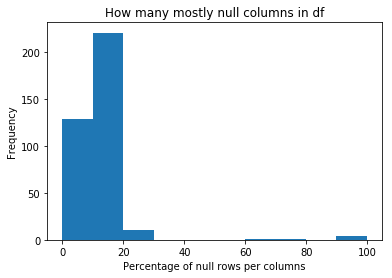

,0,pc_rows_null
LNR,0,0.000000
AGER_TYP,0,0.000000
AKT_DAT_KL,73499,8.247000
ALTER_HH,73499,8.247000
ALTER_KIND1,810163,90.904837
ALTER_KIND2,861722,96.690047
ALTER_KIND3,885051,99.307691
ALTER_KIND4,890016,99.864792
ALTERSKATEGORIE_FEIN,262947,29.504130
ANZ_HAUSHALTE_AKTIV,93148,10.451729


In [4]:
## Look for nans in columns
azdias_nullcols = nullcols_check(azdias)
azdias_nullcols

#### Cleaning

In [4]:
def clean_arvato_data(df):
    """
    Function specifically for cleaning the population and customer dataframes
        
    1. Column(s) that can be changed following investigation:
    
        ALTER_KINDX - binned into new categorical column denoting whether:
            0 - no children
            1 - child(ren) under 5
            2 - child(ren) under 5 - 10
            3 - child(ren) under 10 - 15
            4 - child(ren) under 15 - 20
            5 - child(ren) over 20
        
        D19_BANKEN_ONLINE_QUOTE_12:
            fill null values with 0 if D19_BANKEN_ONLINE_DATUM = 6, 7, 8, 9, 10
            
        D19_GESAMT_ONLINE_QUOTE_12:
            fill null values with 0 if D19_GESAMT_ONLINE_DATUM = 6, 7, 8, 9, 10
            
        D19_VERSAND_ONLINE_QUOTE_12:
            fill null values with 0 if D19_VERSAND_ONLINE_DATUM = 6, 7, 8, 9, 10
       
    2. Columns that may be useful have nulls pushed to existing unknown category:
        
        D19_KONSUMTYP
        'KBA05_' columns
        REGIOTYP
        KKK
        MOBI_REGIO
        'PLZ8_' columns
        'KBA13_' columns
        RELAT_AB
        ORTSGR_KLS9
        INNENSTADT
        EWDICHTE
        BALLRAUM
        ALTER_HH
        CAMEO_DEUG_2015
        EWDICHTE
        KK_KUNDENTYP
        ALTERSKATEGORIE_FEIN, assuming that like ALTERSKATEGORIE_GROSS, -1 or 0 = unknown
        
    3. Any columns that at this point are more than 50% null are dropped
    
    4. Any rows that are more than 50% null are dropped
    
    5. Otherwise they are filled with the mode (if no unknown category available):
        D19_KONSUMTYP
        MOBI_REGIO
        PLZ8_BAUMAX
        
    6. 'Unknown' is sorted out so that only one category for each column represents unknown (-1)
    
    7. 'Mixed type' columns are fixed:
        CAMEO_DEUG_2015
        CAMEO_INTL_2015
        
    8. Categorical columns converted to categorical type:
        
    
    """
    ######## 1 ######## REWORK SOME COLUMNS TO ADDRESS NULLS
    
    try: # if cleaning has been done previously
        cols_to_use = ['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4']
        df['youngest_child'] = df.loc[:, cols_to_use].min(axis=1)
        df['youngest_child'].fillna(value=0, inplace=True)
        df['youngest_child_bin'] = np.NaN
        df.loc[(df['youngest_child'] == 0), 'youngest_child_bin'] = 0
        df.loc[((df['youngest_child'] > 0) & (df['youngest_child'] < 5)), 'youngest_child_bin'] = 1
        df.loc[((df['youngest_child'] >= 5) & (df['youngest_child'] < 10)), 'youngest_child_bin'] = 2
        df.loc[((df['youngest_child'] >= 10) & (df['youngest_child'] < 15)), 'youngest_child_bin'] = 3
        df.loc[((df['youngest_child'] >= 15) & (df['youngest_child'] < 20)), 'youngest_child_bin'] = 4
        df.loc[(df['youngest_child'] >= 20), 'youngest_child_bin'] = 5
        df.drop(labels=cols_to_use, axis=1, inplace=True)
        print(f'{cols_to_use} updated')
    except:
        pass
    
    try:
        for col, source in zip(['D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12',
                                'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12',
                               'D19_TELKO_ONLINE_QUOTE_12'],
                               ['D19_BANKEN_ONLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM',
                                'D19_VERSAND_ONLINE_DATUM', 'D19_VERSI_ONLINE_DATUM',
                               'D19_TELKO_ONLINE_DATUM']):
            df.loc[(df[source].isin([6, 7, 8, 9, 10])), col] = 0
        print('D19 cols updated')
    except:
        pass
    
    ######## 2 ######## FILL NAN VALUES WITH UNKNOWN CATEGORY MAPPING
    
    df['D19_KONSUMTYP'].fillna(value=0, inplace=True)
    
    for col in df.columns:
        if 'KBA05_' in col:
            df[col].fillna(value=-1, inplace=True)
        
    for col in ['REGIOTYP', 'KKK']:
        df[col].fillna(value=-1, inplace=True) 
    for col in df.columns:
        if ('PLZ8_' in col) & (col != 'PLZ8_BAUMAX'):
            df[col].fillna(value=-1, inplace=True)
        elif 'KBA13_' in col:
            df[col].fillna(value=-1, inplace=True)
            
    for col in ['RELAT_AB', 'ORTSGR_KLS9', 'INNENSTADT', 'EWDICHTE', 'BALLRAUM', 'CAMEO_DEUG_2015',
                'EWDICHTE', 'KK_KUNDENTYP', 'ALTERSKATEGORIE_FEIN']:
        df[col].fillna(value=-1, inplace=True) 
        
    df['ALTER_HH'].fillna(value=0, inplace=True)
    
    print('NaNs pushed to unknown where possible')
    
    ######## 3 ######## REMOVE COLUMNS WITH >= 50% NULLS
    
    for col in df.columns:
        if df[col].isna().sum() >0:
            if (df[col].isna().sum())/(df[col].count()) >= 0.5:
                print(f'column {col} dropped due to >50% nulls')
                df.drop(col, axis=1, inplace=True)
    
    ######## 4 ######## REMOVE ROWS WITH >= 50% NULLS
    
    previous_rows = df.shape[1]
    threshold = df.shape[1]/2
    df.dropna(axis=0, thresh=threshold)
    print(f'{previous_rows-df.shape[1]} majority-null rows dropped')
    
    ######## 5 ######## IMPUTE REMAINING NULLS BY IMPUTATION USING COLUMN MODE (better for categorical than mean!)
    
    i=0
    for col in df.columns:
        if df[col].isna().sum() >0:
            df.fillna(value=df[col].mode()[0], inplace=True)
            i+=1
    print(f'{i} columns had nulls imputed with mode')
    
    ######## 6 ######## ENSURE UNKNOWN IS ONE CATEGORY ONLY (-1)

    # Columns with -1, 0 for unknown: #
    columns0 = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GEBAEUDETYP', 'HH_EINKOMMEN_SCORE', 
                'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'REGIOTYP', 'TITEL_KZ', 
                'WOHNDAUER_2008', 'GEOSCORE_KLS7', 'HAUSHALTSSTRUKTUR', 'WACHSTUMSGEBIET_NB', 'W_KEIT_KIND_HH']
    for col in columns0:
        # in case column has been dropped previously:
        try:
            df.loc[(df[col] == 0), col] = -1
        except Exception as inst:
            print(f'cannot correct {col}:')
            print(f'    {type(inst)}')       # the exception instance
            print(f'    {inst.args}')        # arguments stored in .args
            print(f'    {inst}') 
            

    # Columns with -1, 9 for unknown:
    columns9 = ['KBA05_ALTER1','KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_ANHANG','KBA05_AUTOQUOT','KBA05_CCM1',
                'KBA05_CCM2','KBA05_CCM3','KBA05_CCM4','KBA05_DIESEL','KBA05_FRAU','KBA05_HERST1','KBA05_HERST2','KBA05_HERST3',
                'KBA05_HERST4','KBA05_HERST5','KBA05_HERSTTEMP','KBA05_KRSAQUOT','KBA05_KRSHERST1','KBA05_KRSHERST2',
                'KBA05_KRSHERST3','KBA05_KRSKLEIN','KBA05_KRSOBER','KBA05_KRSVAN','KBA05_KRSZUL','KBA05_KW1','KBA05_KW2',
                'KBA05_KW3','KBA05_MAXAH','KBA05_MAXBJ','KBA05_MAXHERST','KBA05_MAXSEG','KBA05_MAXVORB','KBA05_MOD1',
                'KBA05_MOD2','KBA05_MOD3','KBA05_MOD4','KBA05_MOD8','KBA05_MODTEMP','KBA05_MOTOR','KBA05_MOTRAD','KBA05_SEG1',
                'KBA05_SEG10','KBA05_SEG2','KBA05_SEG3','KBA05_SEG4','KBA05_SEG5','KBA05_SEG6','KBA05_SEG7','KBA05_SEG8',
                'KBA05_SEG9','KBA05_VORB0','KBA05_VORB1','KBA05_VORB2','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4',
                'RELAT_AB','SEMIO_DOM','SEMIO_ERL','SEMIO_FAM','SEMIO_KAEM','SEMIO_KRIT','SEMIO_KULT','SEMIO_LUST','SEMIO_MAT',
                'SEMIO_PFLICHT','SEMIO_RAT','SEMIO_REL','SEMIO_SOZ','SEMIO_TRADV','SEMIO_VERT','ZABEOTYP']
    for col in columns9:
        # in case column has been dropped previously:
        try:
            df.loc[(df[col] == 9), col] = -1
        except Exception as inst:
            print(f'cannot correct {col}:')
            print(f'    {type(inst)}')       # the exception instance
            print(f'    {inst.args}')        # arguments stored in .args
            print(f'    {inst}') 
    
    print('Unknowns forced to single category')
    
    ######## 7 ######## FIX MIXED DATA TYPES (SEE ERROR ON IMPORT)
    
    # in case of multiple partial passes through cleaning during development:
    try:
        df.loc[(df['CAMEO_DEUG_2015'] == 'X'), 'CAMEO_DEUG_2015'] = -1
    except:
        pass
    try:
        df.loc[(df['CAMEO_INTL_2015'] == 'XX'), 'CAMEO_INTL_2015'] = -1
    except:
        pass
    for col in ['CAMEO_DEUG_2015','CAMEO_INTL_2015']:
        df[col].fillna(value=-1, inplace=True) # may not be necessary not sure
        df[col] = [int(x) for x in df[col]] 
        
    print('Mixed data types fixed')
    
    ######## 8 ######## CONVERT TO CATEGORICAL
    
    ## Easier to convert categoricals by first pulling out columns that are NOT categorical
    noncat = ['GEBURTSJAHR', 'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR']

    for col in df.columns:
        if col in noncat:
            pass
        else:
            df[col].astype('category')
    
    print('Columns converted to categorical')
    
    ## Print summary?
        
    for col in df.columns:
        if df[col].isna().sum() >0:
            print(col)
    print('finished')
    print(f'size of dataset: {df.shape}')

    return df

In [5]:
cleaned_azdias = clean_arvato_data(azdias)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4'] updated
NaNs pushed to unknown where possible
column EXTSEL992 dropped due to >50% nulls
0 majority-null rows dropped
1 columns had nulls imputed with mode
cannot correct GEOSCORE_KLS7:
    <class 'KeyError'>
    ('GEOSCORE_KLS7',)
    'GEOSCORE_KLS7'
cannot correct HAUSHALTSSTRUKTUR:
    <class 'KeyError'>
    ('HAUSHALTSSTRUKTUR',)
    'HAUSHALTSSTRUKTUR'
cannot correct WACHSTUMSGEBIET_NB:
    <class 'KeyError'>
    ('WACHSTUMSGEBIET_NB',)
    'WACHSTUMSGEBIET_NB'
Unknowns forced to single category
Mixed data types fixed
Columns converted to categorical
finished
size of dataset: (891221, 363)


In [9]:
## Want to make sure that categorical features don't have values that are outside of those specified in the data dictionary
# note GEBURTSJAHR has many 0s in - not helpful

for col in cleaned_azdias.columns:
    try:
        print(f'for {col}, min={min(cleaned_azdias[col])}, max={max(cleaned_azdias[col])}')
    except:
        print(f'{col} is of mixed type')

## Notes:
# ANZ_HAUSHALTE_AKTIV goes up to 595.0 which is high but may represent a large block of flats
# GEBURTSJAHR min = 0, very unhelpful.
# KBA13_ANZAHL_PKW max=2300.0, cannot find in data dictionary, no idea if reasonable or not

for LNR, min=191653, max=1082873
for AGER_TYP, min=-1, max=3
for AKT_DAT_KL, min=1.0, max=9.0
for ALTER_HH, min=0.0, max=21.0
for ALTERSKATEGORIE_FEIN, min=-1.0, max=25.0
for ANZ_HAUSHALTE_AKTIV, min=0.0, max=595.0
for ANZ_HH_TITEL, min=0.0, max=23.0
for ANZ_KINDER, min=0.0, max=11.0
for ANZ_PERSONEN, min=0.0, max=45.0
for ANZ_STATISTISCHE_HAUSHALTE, min=0.0, max=449.0
for ANZ_TITEL, min=0.0, max=6.0
for ARBEIT, min=1.0, max=9.0
for BALLRAUM, min=-1.0, max=7.0
CAMEO_DEU_2015 is of mixed type
for CAMEO_DEUG_2015, min=-1, max=9
for CAMEO_INTL_2015, min=-1, max=55
for CJT_GESAMTTYP, min=1.0, max=6.0
for CJT_KATALOGNUTZER, min=1.0, max=5.0
for CJT_TYP_1, min=1.0, max=5.0
for CJT_TYP_2, min=1.0, max=5.0
for CJT_TYP_3, min=1.0, max=5.0
for CJT_TYP_4, min=1.0, max=5.0
for CJT_TYP_5, min=1.0, max=5.0
for CJT_TYP_6, min=1.0, max=5.0
for D19_BANKEN_ANZ_12, min=0, max=6
for D19_BANKEN_ANZ_24, min=0, max=6
for D19_BANKEN_DATUM, min=1, max=10
for D19_BANKEN_DIREKT, min=0, max=7
for D19_BANKEN_GROSS

### Demographics data for customers of a mail-order company
191 652 persons (rows) x 369 features (columns) <br>
Should be similar to previous dataset

In [6]:
# load in the data
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Cleaning

In [7]:
cleaned_customers = clean_arvato_data(customers)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4'] updated
NaNs pushed to unknown where possible
column EXTSEL992 dropped due to >50% nulls
0 majority-null rows dropped
1 columns had nulls imputed with mode
cannot correct GEOSCORE_KLS7:
    <class 'KeyError'>
    ('GEOSCORE_KLS7',)
    'GEOSCORE_KLS7'
cannot correct HAUSHALTSSTRUKTUR:
    <class 'KeyError'>
    ('HAUSHALTSSTRUKTUR',)
    'HAUSHALTSSTRUKTUR'
cannot correct WACHSTUMSGEBIET_NB:
    <class 'KeyError'>
    ('WACHSTUMSGEBIET_NB',)
    'WACHSTUMSGEBIET_NB'
Unknowns forced to single category
Mixed data types fixed
Columns converted to categorical
finished
size of dataset: (191652, 366)


### Cleaned Data

In [2]:
# ## Writing the prepared data to a csv for speed:
# cleaned_azdias.to_csv('azdias_cleaned.csv', sep=';')
# cleaned_customers.to_csv('customers_cleaned.csv', sep=';')

In [ ]:
## load cleaned data in
azdias_cleaned = pd.read_csv('azdias_cleaned.csv', sep=';')
# customers_cleaned = pd.read_csv('customers_cleaned.csv', sep=';')

In [ ]:
# azdias_cleaned.head(5)
azdias_cleaned['CAMEO_DEU_2015'].unique()

Note that the field CAMEO_DEU_2015, though it should only contain 

### Sample Cleaned Data

In [7]:
def tidy_data(df):   
    ## Misc columns and indexing (unless previously done):
    
    # EINGEFUEGT_AM - some sort of timestamp, not needed
    df.drop(labels=['EINGEFUEGT_AM'], axis=1, inplace=True)
    
    ## Date house appeared in database - not useful
    df.drop(labels=['MIN_GEBAEUDEJAHR'], axis=1, inplace=True)

    # UNAMED - a reset index from writing - can be dropped
    df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

    # Also set the index to LNR (the id)
    df.set_index('LNR', inplace=True)
    
    return df

#### General population

In [8]:
fraction=0.1 #0.3
sample_azdias = tidy_data(azdias_cleaned.sample(frac=fraction, replace=False, random_state=1))

In [9]:
## Writing the prepared data to a csv for speed:
sample_azdias.to_csv(f'sample_azdias_{fraction}.csv', sep=';')

In [10]:
del azdias_cleaned

#### Customers

In [ ]:
fraction=0.3

In [52]:
# For un-supervised do not need the mail order company data
sample_customers = customers_cleaned.drop(labels=['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE'], axis=1)
sample_customers = tidy_data(sample_customers.sample(frac=fraction, replace=False, random_state=1))

In [53]:
## Writing the prepared data to a csv for speed:
sample_customers.to_csv(f'sample_customers{fraction}.csv', sep=';')

In [54]:
del customers_cleaned

Cleaning all done on Udacity Servers

## Read in cleaned, sampled data

In [2]:
## load cleaned sample of general population in
fraction=0.1 #0.3
sample_azdias = pd.read_csv(f'sample_azdias_{fraction}.csv', sep=';')
# sample_azdias.set_index('LNR', inplace=True)

In [3]:
## load cleaned sample of customers in - note this does not have customer-specific features (products etc)
fraction=0.3
sample_customers = pd.read_csv(f'sample_customers{fraction}.csv', sep=';')
# sample_customers.set_index('LNR', inplace=True)

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [7]:
continuous_vars = ['GEBURTSJAHR', 'KBA13_ANZAHL_PKW', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
              'ANZ_PERSONEN', 'ANZ_TITEL', 'ANZ_STATISTISCHE_HAUSHALTE', 'EINGEZOGENAM_HH_JAHR']#, 'MIN_GEBAEUDEJAHR'

### FAMD

Note that PCA is best for linear relations and continuous rather than categorical variables, so FAMD trialled <br>
see https://pypi.org/project/light-famd/ and https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210

In [89]:
from prince import FAMD

#### Prepare Sample

In [237]:
to_drop = []
for col in sample_azdias.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} car columns to remove')

180 car columns to remove


In [242]:
gen_pop = prepare_famd(sample_azdias, continuous_vars, to_drop, reduce_columns=True, subsample=0.5)

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of prepared data = 44561 rows, 180 columns


In [243]:
datatypes_summary(gen_pop)

,
column_types,data_types
category,<class 'str'>
float64,<class 'numpy.float64'>
int64,<class 'numpy.int64'>


#### Fit FAMD on general population data

In [64]:
famd = FAMD(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
azdias_famd = famd.fit(gen_pop)

ValueError: Not all columns in "Categorical" group are of the same type

Problem with implementation - https://github.com/MaxHalford/prince/issues/109

Might have to do PCA and MCA separately.

### MCA + PCA
Given problems with the implementation of FAMD in prince meaning it is unable to cope with string-type categorical variables, in order to deal with both categorical and continuous features, a combination of MCA and PCA is used.

In [4]:
from prince import MCA, PCA

#### MCA

##### Prepare Sample

In [5]:
to_drop = []
for col in sample_azdias.columns:
    if ('KBA05' in col) | ('KBA13' in col):
        to_drop.append(col)
to_drop.remove('KBA13_ANZAHL_PKW')
print(f'{len(to_drop)} categorical car columns to remove')

180 categorical car columns to remove


In [8]:
print('Categorical data preparation:')
print('\r')
print('General population:')
train_cat = prepare_mca(sample_azdias, to_drop, continuous_vars, reduce_columns=True, subsample=0.5)
print('\r')
print('Customer population:')
test_cat = prepare_mca(sample_customers, to_drop, continuous_vars, reduce_columns=True, subsample=0.5)

Categorical data preparation:

General population:
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object


c:\dev\.conda\envs\ds-nanodegree\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


shape of MCA prepared data = 44561 rows, 1407 columns

Customer population:
Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of MCA prepared data = 28748 rows, 1400 columns


Note that due to issue with MCA https://github.com/MaxHalford/prince/issues/107#issuecomment-768144230, missing categories in test set cannot be handled properly and .transform is not possible. Therefore a work-around is used where columns are one-hot-encoded PRIOR to MCA (which should not normally be necessary)

In [9]:
## Check columns match
train_to_drop, test_to_drop = check_cols_match(train_cat, test_cat, 'train', 'test')

in train but not test:
{'D19_VERSI_ONLINE_DATUM_2', 'ORTSGR_KLS9_0.0', 'D19_TELKO_ANZ_24_6', 'D19_VERSI_ONLINE_QUOTE_12_3.0', 'D19_LOTTO_4.0', 'ANZ_KINDER_9.0', 'D19_TELKO_ONLINE_QUOTE_12_5.0', 'ANZ_KINDER_6.0', 'TITEL_KZ_2.0', 'D19_BANKEN_ONLINE_QUOTE_12_1.0', 'D19_BANKEN_LOKAL_1', 'GEBAEUDETYP_5.0', 'D19_TELKO_ANZ_12_6'}
in test but not train:
{'D19_LOTTO_2.0', 'D19_BANKEN_OFFLINE_DATUM_3', 'D19_BANKEN_ONLINE_QUOTE_12_6.0', 'ANZ_KINDER_8.0', 'D19_VERSI_ANZ_12_6', 'TITEL_KZ_3.0'}


In [10]:
## Create 'dummies' - note this won't work with train for some reason - get divide by 0 error
# Therefore drop in test what is not in train (not ideal)
test_cat.drop(labels=test_to_drop, axis=1, inplace=True)
for col in train_to_drop:
    test_cat[col] = 0
# test_cat.head()

In [11]:
## Match column order
test_cat = test_cat[train_cat.columns.tolist()]

In [12]:
## Check categories match
train_to_drop, test_to_drop = check_cats_match(train_cat, test_cat, 'train', 'test')

# ## Note that if I remove in train things that are not in test I get errors with MCA fit - possibly results in a feature of only 0s?
# # Cannot deal with errors with MCA transform with test without carrying out OHE separately
# # Could try to find examples of these values in larger sample, or take larger set of customers and hope?

# ## Drop non matching and check number of rows - can always pull in larger sample
# # for col in train_to_drop:
# #     train_cat = train_cat[train_cat[col].isin(train_to_drop[col]) == False]
# # print(train_cat.shape)
# for col in test_to_drop:
#     test_cat = test_cat[test_cat[col].isin(test_to_drop[col]) == False]
# print(test_cat.shape)

In train but not in test:
{'ANZ_KINDER_6.0': [1], 'ANZ_KINDER_9.0': [1], 'D19_BANKEN_LOKAL_1': [1], 'D19_BANKEN_ONLINE_QUOTE_12_1.0': [1], 'D19_LOTTO_4.0': [1], 'D19_TELKO_ANZ_12_6': [1], 'D19_TELKO_ANZ_24_6': [1], 'D19_TELKO_ONLINE_QUOTE_12_5.0': [1], 'D19_VERSI_ONLINE_DATUM_2': [1], 'D19_VERSI_ONLINE_QUOTE_12_3.0': [1], 'GEBAEUDETYP_5.0': [1], 'ORTSGR_KLS9_0.0': [1], 'TITEL_KZ_2.0': [1]}
In test but not in train:
{}


In [315]:
## Check for nulls/inf

# test_cat[test_cat.isna().any(axis=1)]
# test_cat[test_cat.isin([np.inf, -np.inf]).any(axis=1)]

##### Fit MCA on categorical general population data

In [13]:
mca = MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
azdias_mca = mca.fit(train_cat)

MCA for categorical data



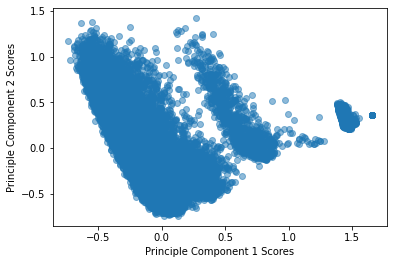

  Driving highly negative PC1 values Driving highly positive PC1 values
0           D19_VERSI_ONLINE_DATUM_1                 WOHNDAUER_2008_1.0
1                 D19_TELKO_ANZ_12_5                       TITEL_KZ_1.0
2     D19_BANKEN_ONLINE_QUOTE_12_9.0                        SOHO_KZ_1.0
3     D19_BANKEN_ONLINE_QUOTE_12_2.0                    OST_WEST_KZ_1.0
4      D19_TELKO_ONLINE_QUOTE_12_5.0                      EWDICHTE_-1.0

  Driving highly negative PC2 values Driving highly positive PC2 values
0                    GEBAEUDETYP_5.0      D19_TELKO_ONLINE_QUOTE_12_5.0
1                       ALTER_HH_2.0     D19_BANKEN_ONLINE_QUOTE_12_9.0
2                       ALTER_HH_3.0                     D19_BIO_OEKO_2
3            LP_LEBENSPHASE_FEIN_6.0     D19_BANKEN_ONLINE_QUOTE_12_7.0
4              ONLINE_AFFINITAET_0.0     D19_BANKEN_ONLINE_QUOTE_12_8.0


In [14]:
gen_pop_mca_results = plot_mca(azdias_mca, train_cat)

Note that since the data had to be one-hot-encoded BEFORE mca, the explained_inertia_ throws a float division by zero error, which it did not do before. See below for how it runs without the OHE:

Data type of column CAMEO_DEU_2015 is object
Data type of column D19_LETZTER_KAUF_BRANCHE is object
Data type of column OST_WEST_KZ is object
shape of MCA prepared data = 44561 rows, 172 columns
MCA for categorical data



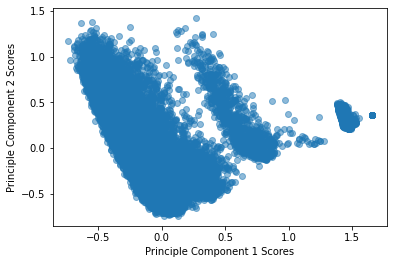

First two components explain: [0.03720371795640544, 0.02184419941411917], total inertia = 7.180232558139535

  Driving highly negative PC1 values Driving highly positive PC1 values
0           D19_VERSI_ONLINE_DATUM_1                 WOHNDAUER_2008_1.0
1                 D19_TELKO_ANZ_12_5                       TITEL_KZ_1.0
2     D19_BANKEN_ONLINE_QUOTE_12_9.0                        SOHO_KZ_1.0
3     D19_BANKEN_ONLINE_QUOTE_12_2.0                    OST_WEST_KZ_1.0
4      D19_TELKO_ONLINE_QUOTE_12_5.0                      EWDICHTE_-1.0

  Driving highly negative PC2 values Driving highly positive PC2 values
0                    GEBAEUDETYP_5.0      D19_TELKO_ONLINE_QUOTE_12_5.0
1                       ALTER_HH_2.0     D19_BANKEN_ONLINE_QUOTE_12_9.0
2                       ALTER_HH_3.0                     D19_BIO_OEKO_2
3            LP_LEBENSPHASE_FEIN_6.0     D19_BANKEN_ONLINE_QUOTE_12_7.0
4              ONLINE_AFFINITAET_0.0     D19_BANKEN_ONLINE_QUOTE_12_8.0


,PC1,PC2
339824,0.064100,-0.388095
661797,-0.328637,0.456781
606705,-0.500387,0.790592
575139,-0.195872,0.073670
986221,-0.268898,-0.058705
...,...,...
559364,1.656368,0.362877
728477,0.027066,-0.455466
615412,-0.015637,-0.167465
474729,-0.435086,0.510536


In [15]:
example = prepare_mca(sample_azdias, to_drop, continuous_vars, reduce_columns=True, subsample=0.5, onehot=False)
eg_mca = MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
eg_train_mca = eg_mca.fit(example)
plot_mca(eg_train_mca, example, show_inertia=True)

In [387]:
(0.03720371795640544 + 0.02184419941411917)/7.180232558139535

0.008223677560915169

Not sure how to interpret inertia explained anyway

##### Apply MCA to categorical customer population data

In [26]:
customer_mca = azdias_mca.transform(test_cat)

MCA for categorical data



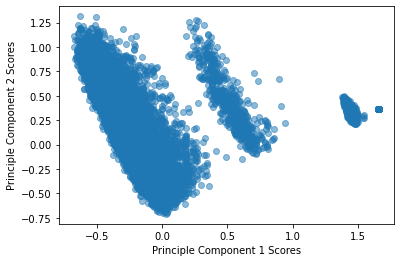

In [27]:
customer_mca_results = plot_mca(customer_mca, test_cat, fit=False, analyse_loadings=False)

#### PCA

##### Prepare Sample

In [16]:
print('Continuous data preparation:')
print('\r')
print('General population:')
train_cont = prepare_pca(sample_azdias, to_drop, continuous_vars, subsample=0.5)
print('\r')
print('Customer population:')
test_cont = prepare_pca(sample_customers, to_drop, continuous_vars, subsample=0.5)

Continuous data preparation:

General population:
shape of PCA prepared data = 44561 rows, 8 columns

Customer population:
shape of PCA prepared data = 28748 rows, 8 columns


In [17]:
## Check columns match
train_to_drop, test_to_drop = check_cols_match(train_cont, test_cont, 'train', 'test')

no columns in train that are not in test
no columns in test that are not in train


##### Fit PCA on continuous general population data

In [18]:
pca = PCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
azdias_pca = pca.fit(train_cont)

PCA for categorical data



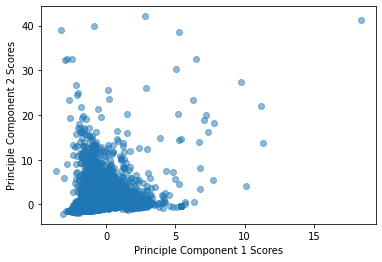

First two components explain: [0.37621404 0.25678651], total inertia = 7.999999999999999

  Driving highly negative PC1 values Driving highly positive PC1 values
0               EINGEZOGENAM_HH_JAHR                          ANZ_TITEL
1                   KBA13_ANZAHL_PKW                       ANZ_HH_TITEL
2                        GEBURTSJAHR         ANZ_STATISTISCHE_HAUSHALTE
3                       ANZ_PERSONEN                ANZ_HAUSHALTE_AKTIV
4                ANZ_HAUSHALTE_AKTIV                       ANZ_PERSONEN

  Driving highly negative PC2 values Driving highly positive PC2 values
0                       ANZ_PERSONEN         ANZ_STATISTISCHE_HAUSHALTE
1                        GEBURTSJAHR                ANZ_HAUSHALTE_AKTIV
2                   KBA13_ANZAHL_PKW                       ANZ_HH_TITEL
3                          ANZ_TITEL               EINGEZOGENAM_HH_JAHR
4               EINGEZOGENAM_HH_JAHR                          ANZ_TITEL


In [19]:
gen_pop_pca_results = plot_pca(azdias_pca, train_cont)

##### Apply PCA to continuous customer population data

In [20]:
customer_pca = azdias_pca.transform(test_cont)

PCA for categorical data



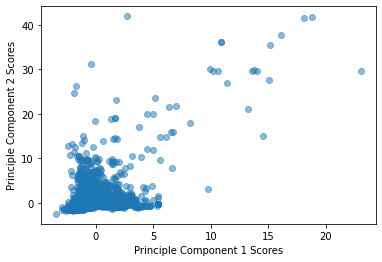

In [21]:
customer_pca_results = plot_pca(customer_pca, test_cont, fit=False, analyse_loadings=False)

### Clustering

#### K Means

In [39]:
from sklearn.cluster import KMeans

In [40]:
## Let it find number of clusters itself:
clusters_inertia = []
for i in range(1, 10):
    print(f'Fitting to {i} clusters') 
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=1)
    kmeans.fit(gen_pop_mca_results)
    clusters_inertia.append(kmeans.inertia_)

Fitting to 1 clusters
Fitting to 2 clusters
Fitting to 3 clusters
Fitting to 4 clusters
Fitting to 5 clusters
Fitting to 6 clusters
Fitting to 7 clusters
Fitting to 8 clusters
Fitting to 9 clusters


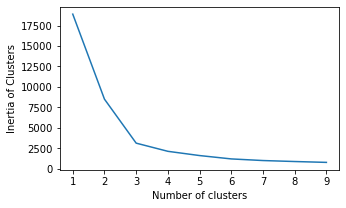

In [41]:
## Plot
plt.figure(figsize=(5,3))
plt.plot(range(1, 10), clusters_inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia of Clusters')
plt.show()

As expected, 3 looks good

In [42]:
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=1)

In [43]:
#predict the labels of clusters.
mca_labels = kmeans.fit_predict(gen_pop_mca_results)
mca_centers = kmeans.cluster_centers_

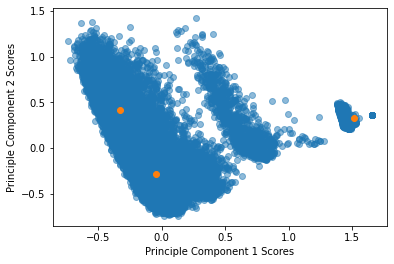

In [ ]:
plt.scatter(gen_pop_mca_results['PC1'], gen_pop_mca_results['PC2'], alpha=0.5);
plt.scatter(pd.DataFrame(mca_centers).iloc[:,0], pd.DataFrame(mca_centers).iloc[:,1])
plt.xlabel('Principle Component 1 Scores');
plt.ylabel('Principle Component 2 Scores');

Not so good, try more centres. Or could predict and compare anyway, since this cannot be done with DBSCAN?

In [45]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=1)

In [46]:
#predict the labels of clusters.
mca_labels = kmeans.fit_predict(gen_pop_mca_results)
mca_centers = kmeans.cluster_centers_

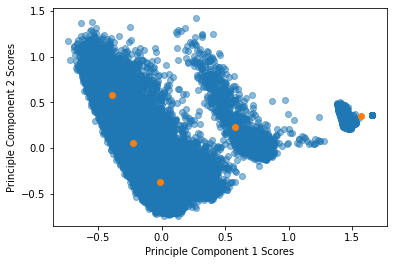

In [47]:
plt.scatter(gen_pop_mca_results['PC1'], gen_pop_mca_results['PC2'], alpha=0.5);
plt.scatter(pd.DataFrame(mca_centers).iloc[:,0], pd.DataFrame(mca_centers).iloc[:,1])
plt.xlabel('Principle Component 1 Scores');
plt.ylabel('Principle Component 2 Scores');

Predict on customer set, and then analyse cluster centers in terms of values of PCs?

#### DBSCAN

Note DBSCAN has no 'predict'-like function, it is only clustering, so cannot try to assign clusters to customers based on cluster centers learned from general population (as you could with k-means), and so the customers will have to be fitted with a new clustering object and the clusters compared.

In [22]:
from sklearn.cluster import DBSCAN

Estimated number of clusters: 4
Estimated number of noise points: 498


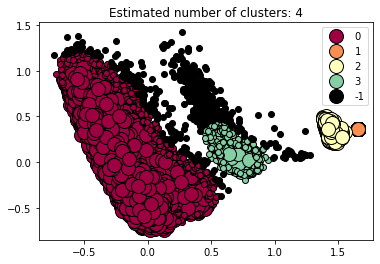

In [35]:
mca_clusters = DBSCAN(eps=0.1, min_samples=100).fit(gen_pop_mca_results)
DBSCAN_processing(mca_clusters, gen_pop_mca_results)

In [36]:
pop_clustered = gen_pop_mca_results.copy(deep=True)
pop_clustered.loc[:,'Cluster'] = mca_clusters.labels_ # append labels to points
total = pop_clustered.shape[0]

DBSCAN_clust_sizes = pop_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["general_population_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_pop'] = 100*(DBSCAN_clust_sizes["general_population_DBSCAN_size"]/total)
DBSCAN_clust_sizes

,general_population_DBSCAN_size,percentage_of_pop
Cluster,,
-1,498,1.117569
0,39783,89.277619
1,2226,4.995400
2,1417,3.179911
3,637,1.429501


Estimated number of clusters: 4
Estimated number of noise points: 487


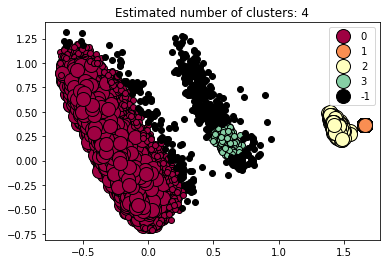

In [37]:
mca_clusters = DBSCAN(eps=0.1, min_samples=100).fit(customer_mca_results)
DBSCAN_processing(mca_clusters, customer_mca_results)

In [48]:
cust_clustered = customer_mca_results.copy(deep=True)
cust_clustered.loc[:,'Cluster'] = mca_clusters.labels_ # append labels to points
total = cust_clustered.shape[0]

temp = cust_clustered.groupby('Cluster').size().to_frame()
temp.columns = ["customer_DBSCAN_size"]
DBSCAN_clust_sizes["customer_DBSCAN_size"] = temp["customer_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_customers'] = 100*(DBSCAN_clust_sizes["customer_DBSCAN_size"]/total)
DBSCAN_clust_sizes['percentage_difference'] = 100*(DBSCAN_clust_sizes['percentage_of_customers']-DBSCAN_clust_sizes['percentage_of_pop'])/DBSCAN_clust_sizes['percentage_of_pop']
DBSCAN_clust_sizes[['percentage_of_pop', 'percentage_of_customers', 'percentage_difference']]

,percentage_of_pop,percentage_of_customers,percentage_difference
Cluster,,,
-1,1.117569,1.694031,51.581748
0,89.277619,73.705997,-17.441799
1,4.995400,21.003200,320.450856
2,3.179911,2.960206,-6.909149
3,1.429501,0.636566,-55.469359


We can see that the main differences are that cluster 0 is under-represented in the customer population, while cluster 1 is significantly over-represented.

Estimated number of clusters: 2
Estimated number of noise points: 831


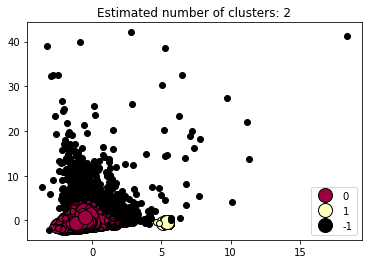

In [49]:
pca_clusters = DBSCAN(eps=0.5, min_samples=100).fit(gen_pop_pca_results)
DBSCAN_processing(pca_clusters, gen_pop_pca_results)

In [50]:
pop_clustered = gen_pop_pca_results.copy(deep=True)
pop_clustered.loc[:,'Cluster'] = pca_clusters.labels_ # append labels to points
total = pop_clustered.shape[0]

DBSCAN_clust_sizes = pop_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["general_population_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_pop'] = 100*(DBSCAN_clust_sizes["general_population_DBSCAN_size"]/total)
DBSCAN_clust_sizes

,general_population_DBSCAN_size,percentage_of_pop
Cluster,,
-1,831,1.864859
0,40084,89.953098
1,3646,8.182043


Estimated number of clusters: 2
Estimated number of noise points: 518


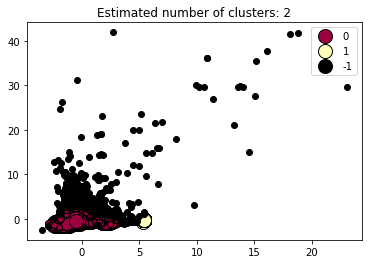

In [51]:
pca_clusters = DBSCAN(eps=0.5, min_samples=100).fit(customer_pca_results)
DBSCAN_processing(pca_clusters, customer_pca_results)

In [52]:
cust_clustered = customer_pca_results.copy(deep=True)
cust_clustered.loc[:,'Cluster'] = pca_clusters.labels_ # append labels to points
total = cust_clustered.shape[0]

temp = cust_clustered.groupby('Cluster').size().to_frame()
temp.columns = ["customer_DBSCAN_size"]
DBSCAN_clust_sizes["customer_DBSCAN_size"] = temp["customer_DBSCAN_size"]
DBSCAN_clust_sizes['percentage_of_customers'] = 100*(DBSCAN_clust_sizes["customer_DBSCAN_size"]/total)
DBSCAN_clust_sizes['percentage_difference'] = 100*(DBSCAN_clust_sizes['percentage_of_customers']-DBSCAN_clust_sizes['percentage_of_pop'])/DBSCAN_clust_sizes['percentage_of_pop']
DBSCAN_clust_sizes[['percentage_of_pop', 'percentage_of_customers', 'percentage_difference']]

,percentage_of_pop,percentage_of_customers,percentage_difference
Cluster,,,
-1,1.864859,1.801864,-3.377999
0,89.953098,74.231251,-17.477827
1,8.182043,23.966885,192.920556
